<a href="https://colab.research.google.com/github/Andresmuri/CoderHouse/blob/main/ProyectoDS_ParteIll_%2BMurillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENTREGA FINAL
##Data Science I : Fundamentos para la Ciencia de Datos


###Consigna

Crearás un notebook que complemente el trabajo realizado en los siguientes apartados:

i) elegir un método de feature selection para reducir la dimensionalidad del dataset

ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos

iii) cálculo de métricas básicas para validar el modelo

iv) generar conclusiones con base en los resultados obtenidos.


# **Solución**



###Dataset: Puestos Sensibles a la Corrupción en el sector público en Colombia



##ABSTRACT:
Es un conjunto de datos que contiene un listado de servidores públicos en Colombia con una vinculación activa en el Sistema de Información y Gestión del Empleo Público – SIGEP que ejercen cargos de confianza y manejo presupuestal de nivel directivo y libre nombramiento y remoción.

La base de datos cruda cuenta con 27444 registros y 25 columnas con información relacionada con la vinculación laboral del funcionario (institución donde labora, cargo, orden, sector, salario), departamento, municipio, sexo, nacionalidad, entre otras. Esta base de datos ofrece una variedad de categorias que permite una caracterización o clasificación de los puestos de libre nombramiento y remoción de los servidores públicos en Colombia relacionadas con el salario. En un futuro esta información puede ser relacionada con otras fuentes de información que contengan procesos de investigación o sentencias y de esta manera realizar modelos de clasificación o predictivos sobre corrupsión estatal.

La base de datos fue obtenida de: https://www.datos.gov.co/Funci-n-p-blica/Puestos-Sensibles-a-la-Corrupci-n/5u9e-g5w9/about_data.



##Diccionario de datos (Variables):

- MUNICIPIO_INSTITUCION : Segundo nivel de división administrativa en Colombia, De acuerdo con el Artículo 311 de Constitución de 1991 y la Ley 136 de 2 de junio de 1994.

- DPTO_INSTITUCION: División administrativa y política según lo establece la Constitución política de 1991, 33 divisiones, 32 departamentos

- ORDEN: Campo de acción de la administración pública de acuerdo con el ordenamiento territorial: nacional o territorial.

- SECTOR_ADMTIVO: El Sector Administrativo está integrado por el Ministerio o Departamento Administrativo, las superintendencias y demás entidades que la ley o el Gobierno Nacional definan como adscritas o vinculadas a aquéllos según correspondiere a cada área (Ley 489 de 1998, Artículo 42).

- NATURALEZA_JURIDICA: Definición legal del organismo o entidad según su actividad o ubicación en la estructura del Estado.

- CLASIFICACION_ORGANICA: Estructura general de las entidades y organismos del poder público en Colombia: Ramas del poder público, órganos de control, órganos autónomos, órganos electorales y SIVJRNR (Sistema Integral de Verdad, Justicia, Reparación y No Repetición​).

- NIVEL_JERARQUICO_EMPLEO: Clasificación según la naturaleza general de sus funciones, los empleos de las entidades nacionales y territoriales se clasifican en los siguientes niveles jerárquicos: Nivel Directivo, Nivel Asesor, Nivel Profesional, Nivel Técnico y Nivel Asistencial.

- TIPO_NOMBRAMIENTO: Tipo de relación legal del servidor público con la entidad (carrera administrativa, libre nombramiento y remoción, periodo fijo, elección popular, temporal, nombramiento provisional y periodo de prueba

- DENOMINACION_EMPLEO_ACTUAL: Nombre del cargo al que se encuentra vinculado el servidor público que se identifica con un código de varios dígitos de acuerdo con la norma vigente de nomenclatura y clasificación de empleos.

- DEPENDENCIA_EMPLEO_ACTUAL: Área de la entidad en la que se encuentra vinculado el servidor público

- ASIG_BASICA: Salario establecido al servidor público según los decretos emitidos por el gobierno nacional

- FECHA_VINCULACION: Fecha en la cual el servidor público inicia su vinculación en la entidad



##Objetivo:
El objetivo del siguente análisis es identificar cuales variables se encuentran relacionadas con la asignación salarial de los funcionarios y de esta manera generar una estandarización de los salarios de acuerdo a las variables encontradas. Se espera generar un modelo para predecir la asignacion salarial que se ajuste en un 85% a los datos.

##Hipotesis:

Teniendo en cuenta que nuestra variable objetivo es asignacion salarial (ASIG_BASICA) se plantean las siguientes hipotesis:

- La asignacion salarial de los funcionarios sigue una distribución normal
- La asignacion salarial de los funcionaros se relaciona con con los años de experiencia en el sector publico o el nivel de formacion
- Con las anteriores variables es posible realizar un algoritmo de regresión para predecir la asignación salarial de los funcionarios.

#Importación de librerias y dataset

In [60]:
# Importación de librerias
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import locale
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE,SelectKBest, f_classif, f_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro



In [61]:
mpl.style.use('bmh')#tema


In [62]:
url = 'https://raw.githubusercontent.com/Andresmuri/Datasets/refs/heads/main/Dataset_ProyectoDS_ParteI_%2BMurillo.csv'
data = pd.read_csv(url, index_col=0)

In [63]:
data.head()

,IDENTIFICACION_FUNCIONARIO,SEXO,NACIONALIDAD,MUNICIPIO_NACIMIENTO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXP_NEG_PROPIO,MESES_EXPERIENCIA_DOCENTE,NIVEL_ACADEMICO,...,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,FECHA_VIN
TIPO_DCTO,,,,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,"123,637",MASCULINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,145,0,0,0,POSTGRADO,...,NACIONAL,DEFENSA,ESPECIAL,RAMA EJECUTIVA,ASESOR,LIBRE NOMBRAMIENTO Y REMOCIÓN,SERVIDOR MISIONAL EN SANIDAD POLICIAL,UNIDADES DESCONCENTRADAS,5458553,1/11/1996
CEDULA DE CIUDADANIA,"177,083",MASCULINO,COLOMBIA,ALBÁN,CUNDINAMARCA,176,0,0,0,POSTGRADO,...,TERRITORIAL,NO APLICA,GOBERNACIÓN,RAMA EJECUTIVA,ASESOR,LIBRE NOMBRAMIENTO Y REMOCIÓN,ASESOR,DESPACHO DEL GOBERNADOR,11321727,4/19/2021
CEDULA DE CIUDADANIA,"179,592",MASCULINO,COLOMBIA,ANAPOIMA,CUNDINAMARCA,98,0,0,0,POSTGRADO,...,TERRITORIAL,NO APLICA,ALCALDÍA,RAMA EJECUTIVA,DIRECTIVO,LIBRE NOMBRAMIENTO Y REMOCIÓN,DIRECTOR ADMINISTRATIVO O FINANCIERO O TÉCNICO...,SECRETARIA PARA EL DESARROLLO Y LA EQUIDAD SOCIAL,3842894,1/5/2016
CEDULA DE CIUDADANIA,"190,678",MASCULINO,COLOMBIA,BELTRÁN,CUNDINAMARCA,203,8,0,0,POSTGRADO,...,TERRITORIAL,NO APLICA,ALCALDÍA,RAMA EJECUTIVA,DIRECTIVO,ELECCIÓN,ALCALDE,DESPACHO DEL ALCALDE,3691591,1/1/2020
CEDULA DE CIUDADANIA,"192,310",MASCULINO,COLOMBIA,BITUIMA,CUNDINAMARCA,177,0,0,0,BASICA SECUNDARIA,...,TERRITORIAL,NO APLICA,ALCALDÍA,RAMA EJECUTIVA,DIRECTIVO,ELECCIÓN POPULAR,ALCALDE,DESPACHO ALCALDE MUNICIPAL,3879492,1/1/2020


##Identificar el tipo de datos

In [64]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24744 entries, CEDULA DE CIUDADANIA to CEDULA DE CIUDADANIA
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDENTIFICACION_FUNCIONARIO  24744 non-null  object
 1   SEXO                        24744 non-null  object
 2   NACIONALIDAD                24744 non-null  object
 3   MUNICIPIO_NACIMIENTO        24744 non-null  object
 4   DPTO_NACIMIENTO             24744 non-null  object
 5   MESES_EXPERIENCIA_PUBLICO   24744 non-null  int64 
 6   MESES_EXPERIENCIA_PRIVADO   24744 non-null  int64 
 7   MESES_EXP_NEG_PROPIO        24744 non-null  int64 
 8   MESES_EXPERIENCIA_DOCENTE   24744 non-null  object
 9   NIVEL_ACADEMICO             24744 non-null  object
 10  NIVEL_FORMACION             24744 non-null  object
 11  NOMBRE_INSTITUCION          24744 non-null  object
 12  MUNICIPIO_INSTITUCION       24744 non-null  object
 13  DPTO_INSTITUCION 

##Manipulación de variables

In [65]:
#Cambiar meses experiencia docente a int
# Reemplazar las comas por puntos y luego convertir a float y por último a int
data['MESES_EXPERIENCIA_DOCENTE'] = data['MESES_EXPERIENCIA_DOCENTE'].str.replace(',', '.').astype(float).astype(int)

In [66]:
#convertir la columna FECHA_VIN al tipo datetime
data['FECHA_VIN'] = pd.to_datetime(data['FECHA_VIN'], format='%d/%m/%Y', errors='coerce')
#dIVIDIR LA COLUMNA DE FECHA EN AÑO Y MES
data['Año_VIN'] = data['FECHA_VIN'].dt.year
data['Mes_VIN'] = data['FECHA_VIN'].dt.month
data['Dia_VIN'] = data['FECHA_VIN'].dt.day

#Identificación de duplicados

In [67]:
data.duplicated()

,0
TIPO_DCTO,
CEDULA DE CIUDADANIA,False
CEDULA DE CIUDADANIA,False
CEDULA DE CIUDADANIA,False
CEDULA DE CIUDADANIA,False
CEDULA DE CIUDADANIA,False
...,...
CEDULA DE CIUDADANIA,True
CEDULA DE CIUDADANIA,True
CEDULA DE CIUDADANIA,False


In [68]:
#identificar y eliminar filas duplicadas a traves de la identificacion del funcionario
data = data.drop_duplicates(subset=['IDENTIFICACION_FUNCIONARIO'])

##Exploración general de las variables numericas

In [69]:
data.describe()

,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXP_NEG_PROPIO,MESES_EXPERIENCIA_DOCENTE,ASIG_BASICA,FECHA_VIN,Año_VIN,Mes_VIN,Dia_VIN
count,"24,737","24,737","24,737","24,737","24,737",15466,"15,466","15,466","15,466"
mean,152,47,0,9,"5,329,983",2017-06-07 02:46:28.568472832,"2,017",4,4
min,-103,0,0,0,"618,000",1958-03-07 00:00:00,"1,958",1,1
25%,46,0,0,0,"3,081,918",2016-02-01 00:00:00,"2,016",1,1
50%,113,11,0,0,"4,531,282",2020-01-01 00:00:00,"2,020",2,3
75%,206,61,0,0,"6,918,321",2020-10-01 00:00:00,"2,020",6,8
max,"3,220","12,189",0,912,"132,552,158",2099-05-04 00:00:00,"2,099",12,12
std,164,116,0,40,"3,031,838",NaN,6,3,4


##Eliminación de columnas que no aportan al análisis y datos nulos

In [70]:
#Eliminar columnas   'IDENTIFICACION_FUNCIONARIO','MESES_EXP_NEG_PROPIO', 'FECHA_VIN' ya que tienen poca variabilidad  y la fecha se dividio en 3 columnas
data = data.drop(columns=['IDENTIFICACION_FUNCIONARIO','MESES_EXP_NEG_PROPIO', 'FECHA_VIN', 'Mes_VIN',	'Dia_VIN'])

In [71]:
#eliminar filas con datos nulos
df1=data.dropna()

In [72]:
#PRESENTAR RESULTADOS EN NUMERO ENTERO
pd.options.display.float_format = '{:,.0f}'.format

In [73]:
df1.describe()

,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,ASIG_BASICA,Año_VIN
count,"15,466","15,466","15,466","15,466","15,466"
mean,143,45,9,"5,066,018","2,017"
std,154,128,40,"3,013,872",6
min,-103,0,0,"618,000","1,958"
25%,42,0,0,"2,965,622","2,016"
50%,106,10,0,"4,249,624","2,020"
75%,194,58,0,"6,613,000","2,020"
max,"2,720","12,189",912,"132,552,158","2,099"


Se identifican valores negativos en meses de experiencia en sector público, lo que representa un error en el momento de ingresar los datos. Tambien se observa un valor extremo en ASIG_BAsica lo que representa un outlier. Igualmente, en Año_VIN se observa un valor de 2099 lo que no es posible. Se visualizan y posteriormente se corrigen estos registros:

### Variable ASIG_BASICA

{'whiskers': [<matplotlib.lines.Line2D at 0x795137943d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7951379438e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x795137943130>],
 'medians': [<matplotlib.lines.Line2D at 0x7951379413f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x795137942080>],
 'means': []}

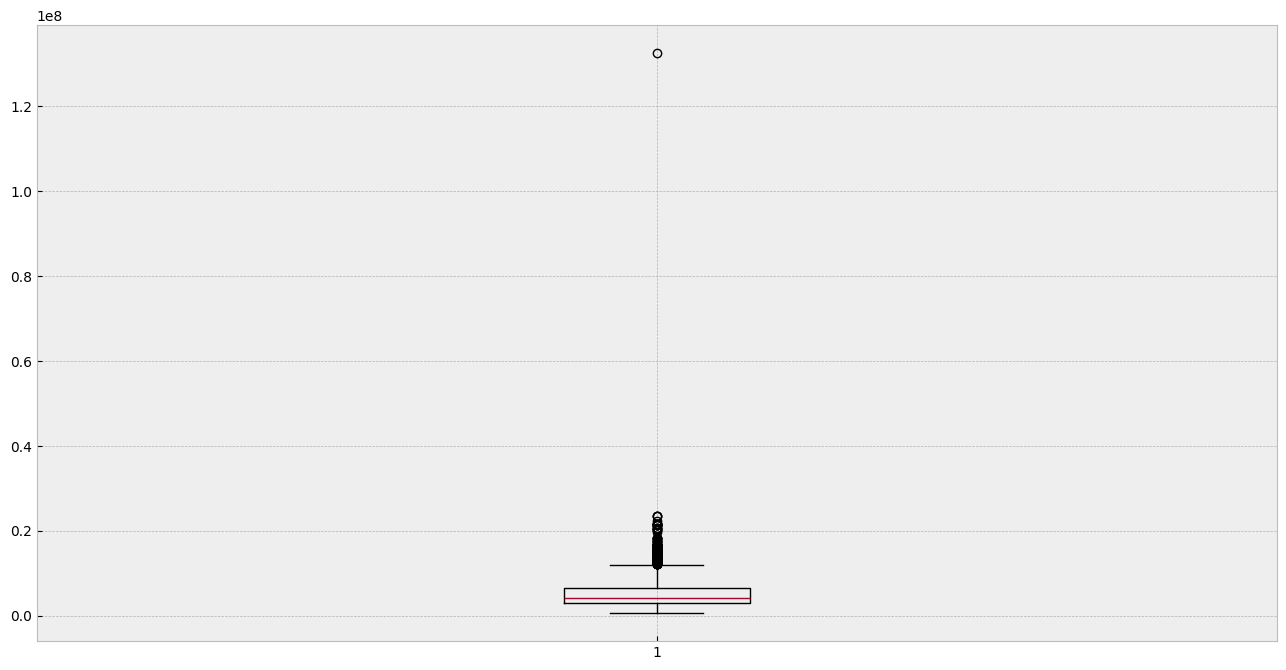

In [74]:
#boxplot de ASIG_BASICA para identificar valores extremos
fig, ax = plt.subplots(figsize=(16, 8))
ax.boxplot(x=df1['ASIG_BASICA'])

In [75]:
#Se identifica el valor maximo de ASIG_BASICA
df1.loc[df1['ASIG_BASICA'] == df1['ASIG_BASICA'].max()]


,SEXO,NACIONALIDAD,MUNICIPIO_NACIMIENTO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,NIVEL_ACADEMICO,NIVEL_FORMACION,NOMBRE_INSTITUCION,...,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,Año_VIN
TIPO_DCTO,,,,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,MASCULINO,COLOMBIA,ARMENIA,QUINDÍO,0,0,0,SIN INFORMACIÓN,SIN INFORMACIÓN,"LA REGION ADMINISTRATIVA Y DE PLANIFICACION, R...",...,TERRITORIAL,NO APLICA,REGIONES ADMINISTRATIVAS Y DE PLANIFICACIÓN - RAP,RAMA EJECUTIVA,DIRECTIVO,LIBRE NOMBRAMIENTO Y REMOCIÓN,GERENTE,Gerencia,132552158,"2,020"


Existe un outlier que corresponde a una Gerencia en el municipio de Armenia en el departamento de Quindio, en un cargo de libre nombramiento y remocion con vinculacion en el 2020 y una asignacion mensual de 132'552.158

In [76]:
#se elimina el valor maximo de ASIG_BASICA
df1 = df1[df1['ASIG_BASICA'] != 132552158]


##AÑO_VIN

In [77]:
#se identifica el valor maximo de Año_VIN ya que presenta un posible error
df1.loc[df1['Año_VIN'] == df1['Año_VIN'].max()]

,SEXO,NACIONALIDAD,MUNICIPIO_NACIMIENTO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,NIVEL_ACADEMICO,NIVEL_FORMACION,NOMBRE_INSTITUCION,...,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,Año_VIN
TIPO_DCTO,,,,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,FEMENINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,284,0,0,POSTGRADO,ESPECIALIZACION,CONSEJO PROFESIONAL NACIONAL DE INGENIERIA,...,NACIONAL,NO APLICA,ESTABLECIMIENTO PÚBLICO,ÓRGANO AUTÓNOMO,PROFESIONAL,LIBRE NOMBRAMIENTO Y REMOCIÓN,PROFESIONAL DE GESTIÓN INSTITUCIONAL,CONSEJO PROFESIONAL NACIONAL DE INGENIERÍA - C...,6798215,"2,099"


In [ ]:
#Se elimina ese registro correspondiente al valor maximo del Año_VIN ya que corresponde al año 2099 y no es posible
df1 = df1[df1['Año_VIN'] != 2099]

##MESES_EXPERIENCIA_PUBLICO

In [85]:
#se eliminan registros negativos '-' en 	MESES_EXPERIENCIA_PUBLICO ya que tampoco es posible que sean numeros negativos
df1=df1[df1['MESES_EXPERIENCIA_PUBLICO'] >= 0]


In [86]:
df=df1.copy()
df.describe()#ya no se observan valores negativos

,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,ASIG_BASICA,Año_VIN
count,"15,462","15,462","15,462","15,462","15,462"
mean,143,45,9,"5,057,884","2,017"
std,154,128,40,"2,834,423",6
min,0,0,0,"618,000","1,958"
25%,42,0,0,"2,965,622","2,016"
50%,106,10,0,"4,249,624","2,020"
75%,194,58,0,"6,613,000","2,020"
max,"2,720","12,189",912,"23,613,305","2,099"


In [87]:
df.shape#revisamos la estructura definitiva de la base de datos


(15462, 22)

Se han eliminado duplicados y se ha verificado que la base de datos se encuetre completamente limpia y no haya valores nulos, asi como que las variables se encuentren correctamente definidas. Una vez transformadas las variables la base de datos queda comprendida por 15464 filas y 22 columnas.




##Análisis exploratorio de datos

Iniciamos con la variable objetivo: ASIG_BASICA

Graficamos con diagrama de cajas e histrograma la distribución de la variable ASIG_BASICA

{'whiskers': [<matplotlib.lines.Line2D at 0x795137cc0d60>,
 'caps': [<matplotlib.lines.Line2D at 0x795136fc0430>,
 'boxes': [<matplotlib.lines.Line2D at 0x795137cc06d0>],
 'medians': [<matplotlib.lines.Line2D at 0x795136fc00a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x795136fc3be0>],
 'means': []}

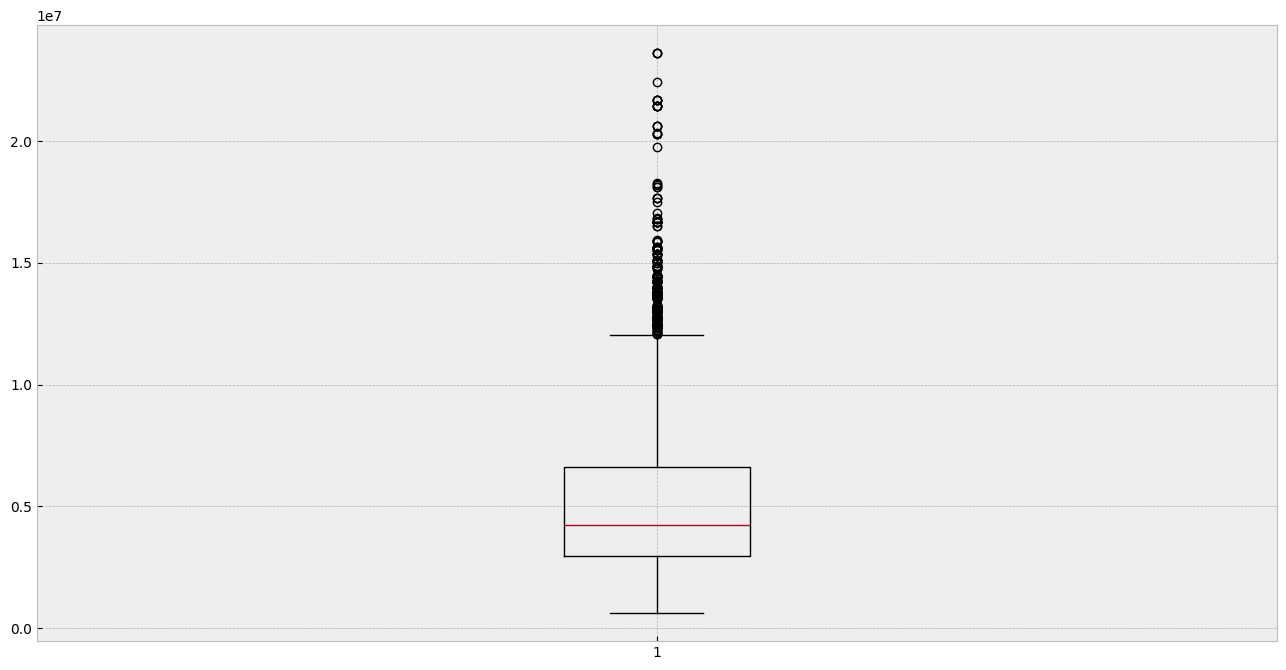

In [88]:
#boxplot del ASIG_BASICA para identificar la nueva distribucion
fig, ax = plt.subplots(figsize=(16, 8))
ax.boxplot(x=df['ASIG_BASICA'])

(array([8.000e+00, 4.000e+01, 1.110e+02, 2.900e+02, 4.740e+02, 9.520e+02,
        9.940e+02, 9.650e+02, 8.530e+02, 1.139e+03, 9.430e+02, 6.790e+02,
        7.840e+02, 6.060e+02, 5.170e+02, 4.280e+02, 4.540e+02, 3.870e+02,
        4.070e+02, 4.170e+02, 2.640e+02, 4.770e+02, 4.930e+02, 2.100e+02,
        2.300e+02, 2.170e+02, 2.460e+02, 1.800e+02, 1.720e+02, 1.650e+02,
        6.400e+01, 2.110e+02, 1.510e+02, 8.200e+01, 6.900e+01, 1.440e+02,
        8.900e+01, 6.500e+01, 8.000e+01, 3.000e+01, 2.900e+01, 4.800e+01,
        1.400e+01, 5.000e+01, 4.800e+01, 4.400e+01, 2.300e+01, 3.200e+01,
        1.100e+01, 8.000e+00, 6.000e+00, 1.000e+01, 6.000e+00, 0.000e+00,
        2.000e+00, 1.300e+01, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 5.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00]),
 array([  618000.

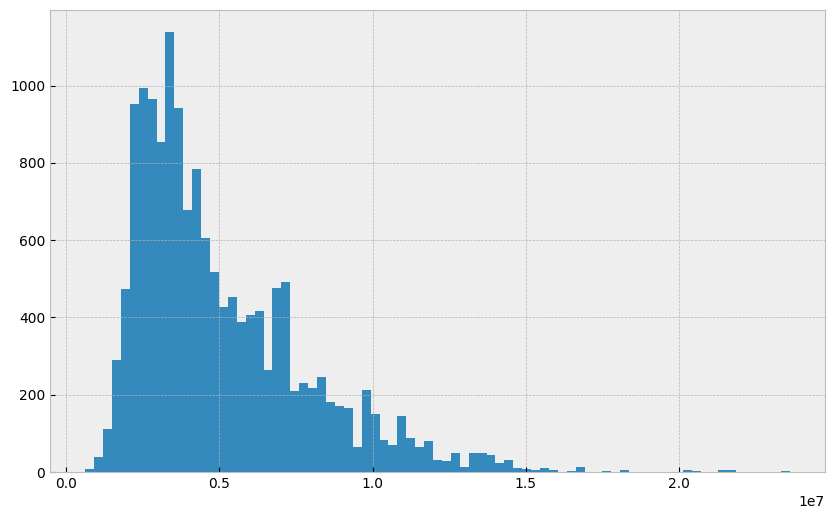

In [89]:
#HISTOGRAMA de la ASIG_BASICA
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(x=df['ASIG_BASICA'], bins='auto', density=False, orientation='vertical')

Prueba de normalidad de la variable ASIG_BASICA

In [90]:
#se realiza prueba de kolmorogov
kolmognrov_test = stats.kstest(df['ASIG_BASICA'], 'norm')
kolmognrov_test

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=618000, statistic_sign=-1)

In [91]:
#prueba shapiro
shapiro_test = stats.shapiro(df['ASIG_BASICA'])
print('Estadistico= %.4f, p-value= %.4f' % (shapiro_test))#redondear a 3 decimales


Estadistico= 0.8872, p-value= 0.0000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15462.



Se observa en las graficas y en las dos pruebas de normalidad con p < 0.05 a pesar de haber eliminado el valor extremo, la asignación sarial no sigue una distribución normal.

Se rechaza la primer hipotesis: La asignacion salarial de los funcionarios no sigue una distribución normal.

Se continua explorando las correlaciones entre variables numericas

In [92]:
 # Seleccionar solo las columnas numéricas del DataFrame
df_numericas = df.select_dtypes(include=[np.number])
# Calcular la matriz de correlación de Spearman debido a la variabilidad
correlacion_spearman = df_numericas.corr(method= 'spearman')
 # Matriz de correlación
figCorrelacion = px.imshow(correlacion_spearman , text_auto=True, aspect="auto", title='Matriz de Correlación')
figCorrelacion.show()

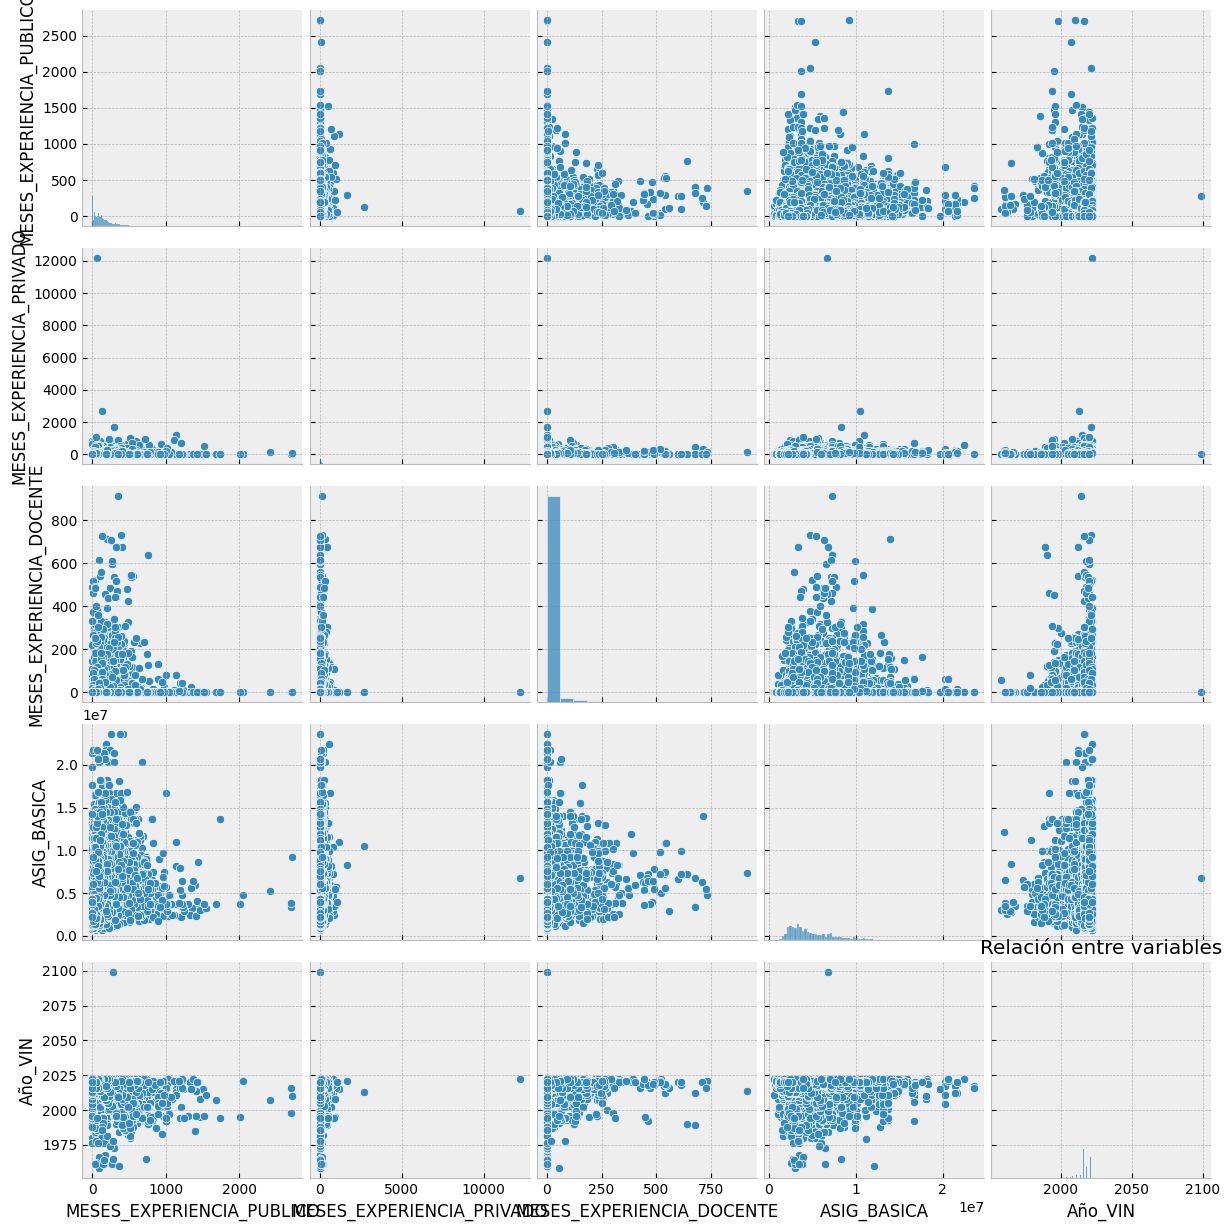

In [93]:
# Gráfico de dispersión (scatter plot)
sns.pairplot(df)
plt.title("Relación entre variables")
plt.show()

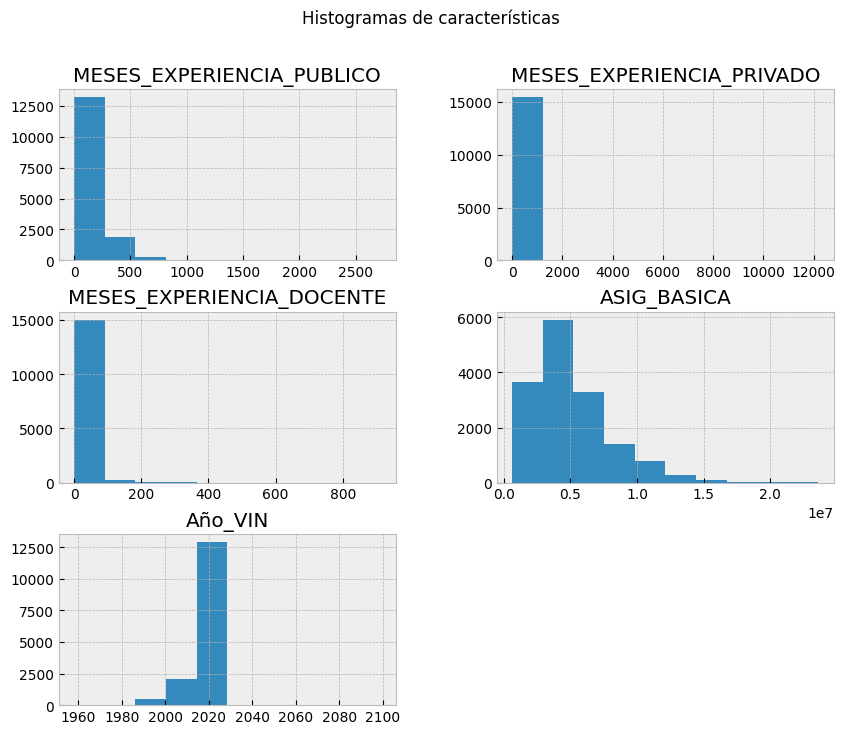

In [94]:
# Histograma de características
df.hist(figsize=(10, 8))
plt.suptitle("Histogramas de características ")
plt.show()

En el anterior diagrama de correlacion no se observan relaciones fuertes entre varibales numericas, se realiza la transformacion con label_encodr de categorias para realizar un nuevo diagrama

In [95]:
# Codificar las variables 'SEXO', 'NACIONALIDAD','MUNICIPIO_NACIMIENTO', 'DPTO_NACIMIENTO',
#'NIVEL_ACADEMICO', 'NIVEL_FORMACION','NOMBRE_INSTITUCION', 'MUNICIPIO_INSTITUCION', 'DPTO_INSTITUCION',
#'ORDEN', 'SECTOR_ADMTIVO', 'NATURALEZA_JURIDICA','CLASIFICACION_ORGANICA', 'NIVEL_JERARQUICO_EMPLEO','TIPO_NOMBRAMIENTO', 'DENOMINACION_EMPLEO_ACTUAL',
#'DEPENDENCIA_EMPLEO_ACTUAL' con LabelEncoder
label_encoder = LabelEncoder()#nos traemos el algoritmo

In [96]:
df['SEXO'] = label_encoder.fit_transform(df['SEXO'])#generamos una nueva col que va a la refleje esta transformacion, sobre que columna queremos que haga esta transformacion y fit_transform
df['NACIONALIDAD'] = label_encoder.fit_transform(df['NACIONALIDAD'])
df['MUNICIPIO_NACIMIENTO'] = label_encoder.fit_transform(df['MUNICIPIO_NACIMIENTO'])
df['DPTO_NACIMIENTO'] = label_encoder.fit_transform(df['DPTO_NACIMIENTO'])
df['NIVEL_ACADEMICO'] = label_encoder.fit_transform(df['NIVEL_ACADEMICO'])
df['NIVEL_FORMACION'] = label_encoder.fit_transform(df['NIVEL_FORMACION'])
df['NOMBRE_INSTITUCION'] = label_encoder.fit_transform(df['NOMBRE_INSTITUCION'])
df['MUNICIPIO_INSTITUCION'] = label_encoder.fit_transform(df['MUNICIPIO_INSTITUCION'])
df['DPTO_INSTITUCION'] = label_encoder.fit_transform(df['DPTO_INSTITUCION'])
df['ORDEN'] = label_encoder.fit_transform(df['ORDEN'])
df['SECTOR_ADMTIVO'] = label_encoder.fit_transform(df['SECTOR_ADMTIVO'])
df['NATURALEZA_JURIDICA'] = label_encoder.fit_transform(df['NATURALEZA_JURIDICA'])
df['CLASIFICACION_ORGANICA'] = label_encoder.fit_transform(df['CLASIFICACION_ORGANICA'])
df['NIVEL_JERARQUICO_EMPLEO'] = label_encoder.fit_transform(df['NIVEL_JERARQUICO_EMPLEO'])
df['TIPO_NOMBRAMIENTO'] = label_encoder.fit_transform(df['TIPO_NOMBRAMIENTO'])
df['DENOMINACION_EMPLEO_ACTUAL'] = label_encoder.fit_transform(df['DENOMINACION_EMPLEO_ACTUAL'])
df['DEPENDENCIA_EMPLEO_ACTUAL'] = label_encoder.fit_transform(df['DEPENDENCIA_EMPLEO_ACTUAL'])


In [97]:
correlacion = df.corr(method= 'spearman')
 # Matriz de correlación
figCorrelacion2 = px.imshow(correlacion, text_auto=True, aspect="auto", title='Matriz de Correlación')
figCorrelacion2.show()

##Evaluación de colinealidad y eliminación de variables relacionadas

In [ ]:
#se eliminan columnas para evitar colinealidad 'MUNICIPIO_NACIMIENTO', 'NIVEL_ACADEMICO', 'NACIONALIDAD', 'MUNICIPIO_INSTITUCION'
df2 = df.drop(columns=['MUNICIPIO_NACIMIENTO', 'NIVEL_ACADEMICO', 'NACIONALIDAD', 'MUNICIPIO_INSTITUCION'])#se crea df2 para proponer el modelo de regresion

In [98]:
#realizamos un nuevo diagrama de correlacion
correlacion2 = df2.corr(method= 'spearman')
figCorrelacion3 = px.imshow(correlacion2, text_auto=True, aspect="auto", title='Matriz de Correlación')
figCorrelacion3.show()

In [99]:
#se eliminan las columnas con colinealidad 'MUNICIPIO_NACIMIENTO', 'NIVEL_ACADEMICO', 'NACIONALIDAD', 'MUNICIPIO_INSTITUCION' tambien de df1 donde las variables no se han transformado a numero
df1= df1.drop(columns=['MUNICIPIO_NACIMIENTO', 'NIVEL_ACADEMICO', 'NACIONALIDAD', 'MUNICIPIO_INSTITUCION'])

## Modelo de regresión

Se propone en primera instancia un modelo de regresión con ASIG_BASICA como variable objetivo

In [100]:
# Preparación de datos para el modelo
X = df2.drop('ASIG_BASICA', axis=1)
y = df2['ASIG_BASICA']

In [101]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de Regresión Lineal
linreg = LinearRegression()

In [102]:
# Aplicar `RFE` para seleccionar características
selector = RFE(linreg, n_features_to_select=5)# se le indica al modelo que seleccione las 5 variables principales
selector = selector.fit(X_train, y_train)

# Características seleccionadas
print("Selected Features:", X.columns[selector.support_])
#solo escojo las variables que me arroja el algoritmo
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

Selected Features: Index(['SEXO', 'NIVEL_FORMACION', 'ORDEN', 'CLASIFICACION_ORGANICA',
       'NIVEL_JERARQUICO_EMPLEO'],
      dtype='object')


De acuerdo al modelo las variables mas representativas son 'SEXO', 'NIVEL_FORMACION', 'ORDEN','CLASIFICACION_ORGANICA', Y 'NIVEL_JERARQUICO_EMPLEO'

In [103]:
# Entrenamiento del modelo con características seleccionadas
linreg.fit(X_train_selected, y_train)

# Predicción y evaluación
y_pred = linreg.predict(X_test_selected)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 6665419306085.653
R2 Score: 0.19960518383774029


Con el modelo de regresion lineal solo se logra que los datos se ajusten un 19%. Al no ser de utilidad predictiva se plantea un segundo modelo.

##Segundo modelo

Se propone un segundo modelo de clasificación donde se parta de la transformacion de la variable objetivo ASIGNACION BASICA por una variable categorica. Se propione dividir la asignacion por cuartiles y asi generar 4 categorias.

In [104]:
#crear copia de df2
df3=df2.copy()

In [105]:
#clasificar ASIG_BASICA en quantiles
df3['ASIG_bin'] = pd.qcut(df3['ASIG_BASICA'], q=4, labels=False)
#insertar labels
df3['ASIG_bin'] = df3['ASIG_bin'].replace({0: 'Bajo', 1: 'Medio', 2: 'Alto', 3: 'Muy Alto'})
df3





,SEXO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,NIVEL_FORMACION,NOMBRE_INSTITUCION,DPTO_INSTITUCION,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,Año_VIN,ASIG_bin
TIPO_DCTO,,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,1,5,145,0,0,1,1344,5,0,5,18,3,0,7,239,3904,5458553,"1,996",Alto
CEDULA DE CIUDADANIA,1,14,98,0,0,1,57,14,1,15,1,3,1,7,54,2703,3842894,"2,016",Medio
CEDULA DE CIUDADANIA,1,14,203,8,0,1,117,14,1,15,1,3,1,2,3,315,3691591,"2,020",Medio
CEDULA DE CIUDADANIA,1,14,177,0,0,3,123,14,1,15,1,3,1,3,3,272,3879492,"2,020",Medio
CEDULA DE CIUDADANIA,1,14,349,0,0,2,1337,5,0,17,12,3,1,2,178,353,7029556,"2,022",Muy Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEDULA DE CIUDADANIA,1,28,16,135,0,0,1337,5,0,17,12,3,0,7,10,131,9230282,"2,022",Muy Alto
CEDULA DE CIUDADANIA,0,28,54,54,0,2,2643,5,0,16,36,3,0,7,10,385,7613882,"2,020",Muy Alto
CEDULA DE CIUDADANIA,0,28,2,92,0,5,1337,5,0,17,12,3,1,7,33,134,3996769,"2,022",Medio


Se identifican los rangos de los salarios de acuerdo a las categorias creadas:

In [106]:
#identificar los valores minimos y maximos de ASIG_BASICA para cada ASIG_bin
valores= df3.groupby('ASIG_bin')['ASIG_BASICA'].agg(['min', 'max'])
rango_salarial= valores.sort_values(by='min', ascending=False)
rango_salarial



,min,max
ASIG_bin,,
Muy Alto,6615000,23613305
Alto,4253225,6613000
Medio,2965622,4249624
Bajo,618000,2965583


Se realiza un conteo de las categorias para observar que se encuentren adecuadamente balanceadas:

In [107]:
#conteno segun ASIG_bin
conteo_asig = df3['ASIG_bin'].value_counts().sort_index()
conteo_asig


,count
ASIG_bin,
Alto,3765
Bajo,3866
Medio,3970
Muy Alto,3863


In [108]:
# Codificar la variable objetivo 'ASIG_bin' con LabelEncoder
label_encoder = LabelEncoder()#nos traemos el algoritmo
df3['asig_encoded'] = label_encoder.fit_transform(df3['ASIG_bin'])#generamos una nueva col que va a la refleje esta transformacion, sobre que columna queremos que haga esta transformacion y fit_transform

# Verificar la codificación
print(label_encoder.classes_)  # Muestra las especies y su valor codificado
print(df3[['ASIG_bin', 'asig_encoded']].head())

['Alto' 'Bajo' 'Medio' 'Muy Alto']
                      ASIG_bin  asig_encoded
TIPO_DCTO                                   
CEDULA DE CIUDADANIA      Alto             0
CEDULA DE CIUDADANIA     Medio             2
CEDULA DE CIUDADANIA     Medio             2
CEDULA DE CIUDADANIA     Medio             2
CEDULA DE CIUDADANIA  Muy Alto             3


In [111]:
#se elimina 'ASIG_BASICA' y 'ASIG_bin' para quedar solo con asig_encoded

modelo2= df3.drop('ASIG_BASICA', axis=1)
modelo2= df3.drop('ASIG_bin', axis=1)

In [112]:
# Preparación de datos para el modelo
X = modelo2.drop('asig_encoded', axis=1)
y = modelo2['asig_encoded']

In [113]:
X

,SEXO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,NIVEL_FORMACION,NOMBRE_INSTITUCION,DPTO_INSTITUCION,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,Año_VIN
TIPO_DCTO,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,1,5,145,0,0,1,1344,5,0,5,18,3,0,7,239,3904,5458553,"1,996"
CEDULA DE CIUDADANIA,1,14,98,0,0,1,57,14,1,15,1,3,1,7,54,2703,3842894,"2,016"
CEDULA DE CIUDADANIA,1,14,203,8,0,1,117,14,1,15,1,3,1,2,3,315,3691591,"2,020"
CEDULA DE CIUDADANIA,1,14,177,0,0,3,123,14,1,15,1,3,1,3,3,272,3879492,"2,020"
CEDULA DE CIUDADANIA,1,14,349,0,0,2,1337,5,0,17,12,3,1,2,178,353,7029556,"2,022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEDULA DE CIUDADANIA,1,28,16,135,0,0,1337,5,0,17,12,3,0,7,10,131,9230282,"2,022"
CEDULA DE CIUDADANIA,0,28,54,54,0,2,2643,5,0,16,36,3,0,7,10,385,7613882,"2,020"
CEDULA DE CIUDADANIA,0,28,2,92,0,5,1337,5,0,17,12,3,1,7,33,134,3996769,"2,022"


In [114]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:

# Crear un modelo de Regresión Logística
logreg = LogisticRegression(max_iter=200)#arbol de decision

In [116]:
# Aplicar `RFE` para seleccionar características
selector = RFE(logreg, n_features_to_select=5)# se indica al modelo que seleccione las 5 variables con mayor significancia
selector = selector.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

In [117]:
# Características seleccionadas
print("Selected Features:", X.columns[selector.support_])
X_train_selected = selector.transform(X_train)
X_train_selected = selector.transform(X_test)

Selected Features: Index(['NIVEL_FORMACION', 'ORDEN', 'SECTOR_ADMTIVO', 'CLASIFICACION_ORGANICA',
       'NIVEL_JERARQUICO_EMPLEO'],
      dtype='object')


El modelo selecciona las variables 'NIVEL_FORMACION', 'ORDEN', 'SECTOR_ADMTIVO', 'CLASIFICACION_ORGANICA', y 'NIVEL_JERARQUICO_EMPLEO' como variables de clasificación.

In [118]:
X.columns

Index(['SEXO', 'DPTO_NACIMIENTO', 'MESES_EXPERIENCIA_PUBLICO',
       'MESES_EXPERIENCIA_PRIVADO', 'MESES_EXPERIENCIA_DOCENTE',
       'NIVEL_FORMACION', 'NOMBRE_INSTITUCION', 'DPTO_INSTITUCION', 'ORDEN',
       'SECTOR_ADMTIVO', 'NATURALEZA_JURIDICA', 'CLASIFICACION_ORGANICA',
       'NIVEL_JERARQUICO_EMPLEO', 'TIPO_NOMBRAMIENTO',
       'DENOMINACION_EMPLEO_ACTUAL', 'DEPENDENCIA_EMPLEO_ACTUAL',
       'ASIG_BASICA', 'Año_VIN'],
      dtype='object')

In [119]:
# Entrenamiento del modelo con características seleccionadas
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=200)

In [120]:
# Predicción y evaluación
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9594827586206897
Confusion Matrix:
 [[1024    0   75    6]
 [   0 1139   19    0]
 [  59   22 1091    0]
 [   7    0    0 1198]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1105
           1       0.98      0.98      0.98      1158
           2       0.92      0.93      0.93      1172
           3       1.00      0.99      0.99      1205

    accuracy                           0.96      4640
   macro avg       0.96      0.96      0.96      4640
weighted avg       0.96      0.96      0.96      4640



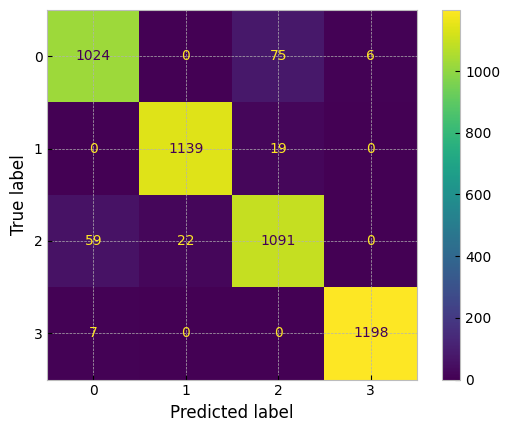

In [ ]:
#graficamos la matriz
matriz_co=confusion_matrix(y_test, y_pred)
img_matriz= ConfusionMatrixDisplay(matriz_co)
img_matriz.plot()


##Resultados
El modelo de clasificación tiene un mejor desempeño que el de regresión:

-Presenta un accuracy del 96%

-La precision, recall y f1 score para todas las categorias supera el 90%

El modelo de clasificacion utiliza las variables 'NIVEL_FORMACION', 'ORDEN', 'SECTOR_ADMTIVO', CLASIFICACION_ORGANICA' y'NIVEL_JERARQUICO_EMPLEO'. Mientras que el modelo de regresión propuso  'SEXO', 'NIVEL_FORMACION', 'ORDEN','CLASIFICACION_ORGANICA', Y 'NIVEL_JERARQUICO_EMPLEO'.
Ambos modelos coinciden en usar 'NIVEL_FORMACION','ORDEN','CLASIFICACION_ORGANICA', Y 'NIVEL_JERARQUICO_EMPLEO'; la diferencia radica en que mientras el modelo de regresion incorpora la variable SEXO, el modelo de clasificación incluye 'ORDEN' y obtiene mejores metricas.

##Contraste de hipotesis:



1. La asignacion salarial de los funcionarios sigue una distribución normal
- Con el diagrama de cajas, el histograma y los test de normalidad no se logró comprobar que los datos sobre el salario siguieran una distribucion normal. Se rechaza la hipotesis nula.

2. La asignacion salarial de los funcionaros se relaciona con con los años de experiencia en el sector publico.
- De acuerdon con los diagramas de correlacion y a la seleccion del modelo definitivo de clasificación la variables 'experiencia en el sector publico'  no se relaciona con el salario, mientras que el nivel de formación si lo hace. Se rechaza la hipotesis

3. Con las anteriores variables es posible realizar un algoritmo de regresión para predecir la asignación salarial de los funcionarios.
- El algoritmo de regresión solo se ajusto en un 19% a los datos. Tuvo un mejor desempeño el modelo de clasificación. Se rechaza la hipotesis.

##Conclusiones

El modelo logístico creado para predecir la probabilidad de que un salario sea bajo, medio, alto o muy alto es en conjunto significativo. El porcentaje de clasificación correcta en el conjunto del test es del 96%, un valor muy por encima del esperado.

Acorde a la predicción de cada categoria obtuvimos una presición del 94% para salarios bajos, 98% para salarios medios, 92% para salarios altos y 100% para salarios muy altos.

Las variables NIVEL_FORMACION', 'ORDEN', 'SECTOR_ADMTIVO', CLASIFICACION_ORGANICA' y'NIVEL_JERARQUICO_EMPLEO' son las variables que mejor predicen el salario de los funcionarios, mientras que el sexo no influye.


